# Question 1

A simple linear regression model represents the relationship between the predictor variable X and the outcome variable Y. The model is a simple linear regression model. We assume that the predictor variable affects the outcome variable.

And the slope (β1) it represents the strength and direction of the relationship between X and Y. That is, how much Y will change when X changes by one unit.

The intercept (β0) is the predicted value of Y when X is 0. That means the starting level of the outcome variable when the predictor variable has no effect.

The error term (ε), on the other hand, represents the random variation in Y that X cannot explain. It is assumed to be normally distributed with a mean of zero.
The final simple linear regression equation is Y = β0 + β1X + ε

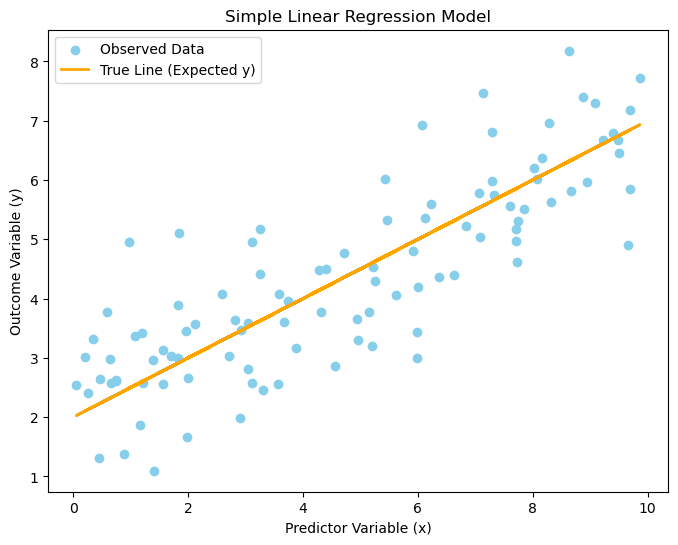

Formula for sample point 97: y_97 = 2.00 + (0.50)*x_97 + ε, where ε ~ N(0, 1.00)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

beta_0 = 2  
beta_1 = 0.5  
sigma = 1  

np.random.seed(42)
x = np.random.uniform(0, 10, 100)

y_expected = beta_0 + beta_1 * x

epsilon = np.random.normal(0, sigma, x.shape[0])
y_observed = y_expected + epsilon

plt.figure(figsize=(8, 6))
plt.scatter(x, y_observed, color='skyblue', label="Observed Data")
plt.plot(x, y_expected, color='orange', linewidth=2, label="True Line (Expected y)")
plt.xlabel("Predictor Variable (x)")
plt.ylabel("Outcome Variable (y)")
plt.title("Simple Linear Regression Model")
plt.legend()
plt.savefig("simple_linear_regression_model.png", format="png")
plt.show()

sample_idx = np.random.randint(0, x.shape[0])
print(f"Formula for sample point {sample_idx}: y_{sample_idx} = "
      f"{beta_0:.2f} + ({beta_1:.2f})*x_{sample_idx} + ε, "
      f"where ε ~ N(0, {sigma**2:.2f})")




# Question 2

In [10]:
import pandas as pd

# Assuming `x` and `y_observed` are from the previous example
df = pd.DataFrame({
    'x': x,
    'Y': y_observed
})

# Display the first few rows of the DataFrame to confirm
print(df.head())


          x         Y
0  3.745401  3.959748
1  9.507143  6.454564
2  7.319939  5.751730
3  5.986585  3.005724
4  1.560186  2.560421


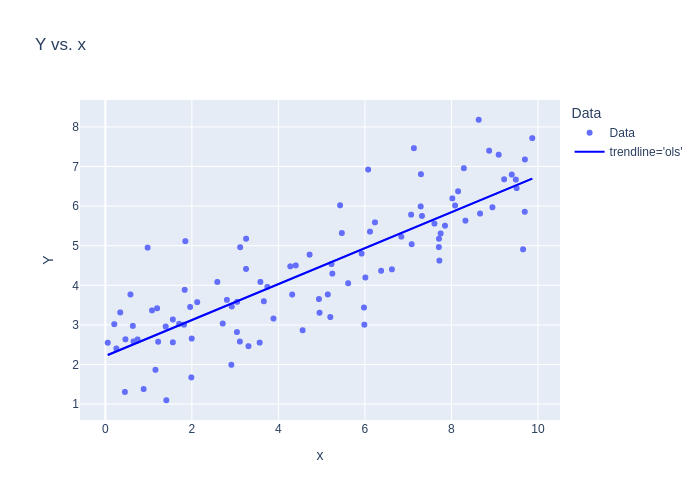

In [15]:
import statsmodels.formula.api as smf  
import plotly.express as px  

model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

fitted_model.summary() 
fitted_model.summary().tables[1]  
fitted_model.params 
fitted_model.params.values 
fitted_model.rsquared  

df['Data'] = 'Data' 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

#### import statsmodels.formula.api as smf
statsmodels.formula.api is a library for building and fitting statistical models. It provides methods for specifying models using formula syntax, making it easy to set up ordinary least squares regressions.

#### model_data_specification = smf.ols("Y~x", data=df) 
smf.ols(“Y~x”, data=df)Y: Specifies the OLS model with Y as the outcome variable and x as the predictor.

#### fitted_model = model_data_specification.fit() 
.fit(): fit the model to the data and estimate the regression coefficients.

#### fitted_model.summary()
Returns a detailed summary of the fitted model, including regression coefficients, standard errors, R^2, and more.

#### fitted_model.summary().tables[1]
Return specific tables containing key model parameters (intercept and prediction coefficients, standard errors, t-values, and p-values) from the summary.

#### fitted_model.params
Provide the estimated model parameters, i.e., the intercept and slope of the fitted line.

#### fitted_model.params.values  
Returns the argument values (intercept and slope) as a NumPy array for easy manipulation.

#### fitted_model.rsquared  
Returns the R^2 value indicating the proportion of variance in the outcome variable explained by the predictor variable.

#### df['Data'] = 'Data'  
#### fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
This will add a new column, Data to create a custom legend in Plotly. This trendline='ols' parameter will automatically add an OLS regression line based on the fitted model.

# Question 3

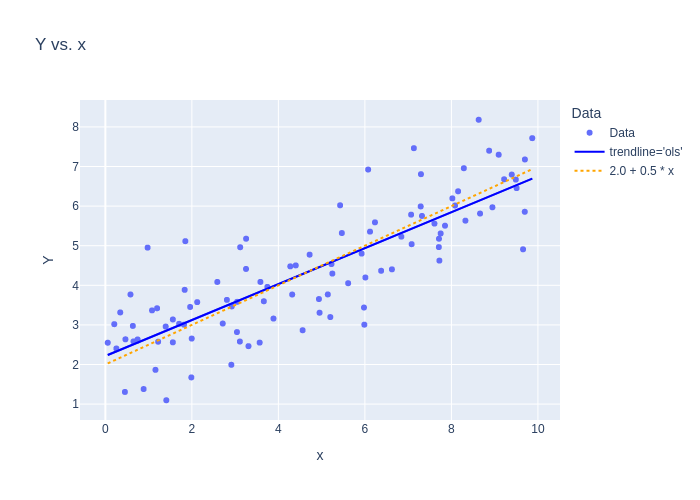

In [17]:
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The first line reflects the theoretical relationship Y=β0+β1⋅x and is not affected by any sampling changes. This line does not change if the simulation is repeated using the same value of β

The OLS trendline is a best fit line. It reflects the relationship found in a single sample, so it includes the effects of sampling variations. If the simulation is re-run, this fitted line may change due to new random noise in the observations.

# Question 4

I need two key coefficients: intercept and slope to fit a simple linear regression model. fit_model.params allows me to access write two coefficients from the fitted model. For example, fit_model.params[0] is the intercept and fit_model.params[1] is the slope.

The fitted values can then be derived by applying these coefficients to each x-value in the dataset, and the values in fitted_model.fittedvalues are derived by applying the coefficients in fitted_model.params this way.

In short, fitted_model.fittedvalues is the predicted value of the model calculated using the fitted model coefficients provided in fitted_model.summary().tables (or more specifically, fitted_model.params).

# Question 5

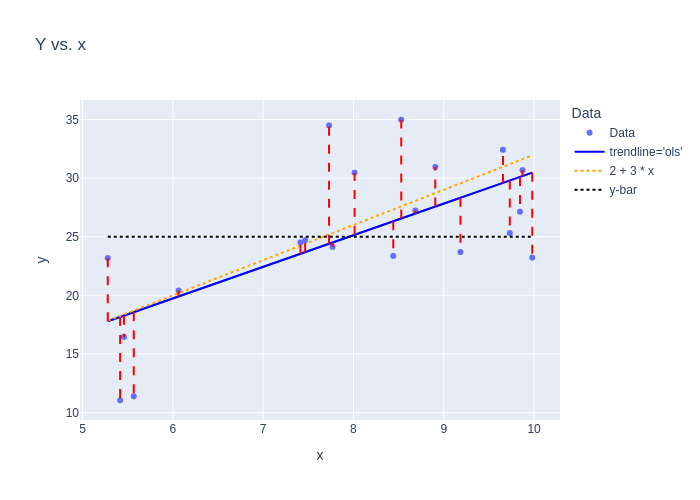

In [15]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("y~x", data=df)
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data'  # hack to add data to legend 
fig = px.scatter(df, x='x', y='y', color='Data', trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")  # For GitHub and MarkUs submissions, use fig.show(renderer="png")


The red dashed line between each data point and the fitted line represents the residuals, and ordinary least squares minimizes the sum of the squares of these vertical residuals to get the line that represents the data as best as possible (i.e. the blue line in the example). The reason for “square” is to ensure that positive and negative residuals do not cancel each other out. In this way, each residual contributes positively to the total error, giving a clearer measure of the overall fit.

# Question 6

#### 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
This expression calculates R^2, which is the proportion of the total variation in Y that is explained by the model.
((Y−fitted_model.fittedvalues)2).sum() represents the sum of squared residuals, or the unexplained variation in Y.
 ((Y−Y.mean())2).sum() represents the total sum of squares, which is the total variation in Y.
By taking 1−SSR/TSS, we get the proportion of variation in Y that the model explains, indicating the accuracy of the model in capturing the trends in Y.

#### fitted_model.rsquared
This will return the R^2 value from the fitted model, a higher R^2 means that the model explains a greater proportion of the variance of Y, indicating a better fit. The opposite is the worse. So it's a measure of model accuracy

#### np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
This expression calculates the square of the correlation coefficient between Y and the model's predicted values.It captures how closely the model's predictions align with the actual Y values.


#### np.corrcoef(Y,x)[0,1]**2
It calculates the square of the correlation coefficient between Y and x. This value captures how much of the variation in Y can be explained solely by x.

# Question 7

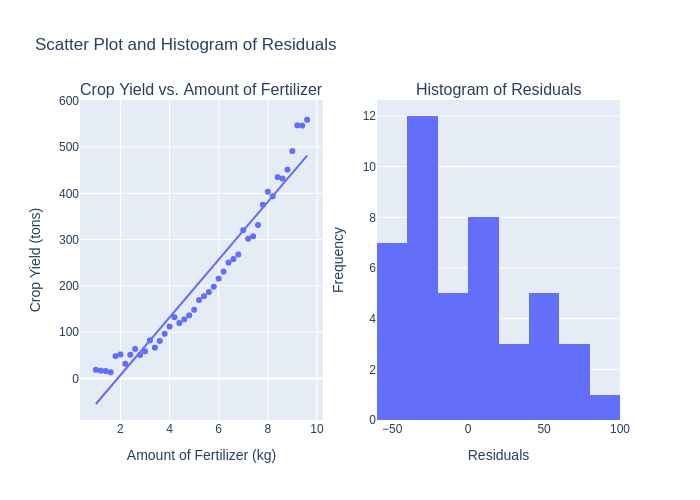

In [17]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Assumptions 1: Crop yields do not increase in a linear manner with fertilizer use. From the graph, it appears that the growth rate of crop yields is increasing, with the appearance of a hidden exponential function, and taking into account effects such as economies of scale, the linear model in the graph may not fit the data well if the model is not in fact linear

Assumptions 2: If the residuals show a pattern, especially if the variance increases as the amount of fertilizer increases, the assumption of constant variance may be invalid, indicating the presence of heteroskedasticity

# Question 8

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        01:32:38   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Null Hypothesis (H0): β1 = 0

β1 = 0 means that the slope of the regression line is 0, indicating that there is no linear relationship between waiting time and eruption duration

As we can see from the output of the code above, the p-value of the slope coefficient test is 0, which means that there is very strong evidence to reject H0, which means that we believe that there is a linear relationship between waiting time and eruption duration at Old Faithful Geyser

# Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


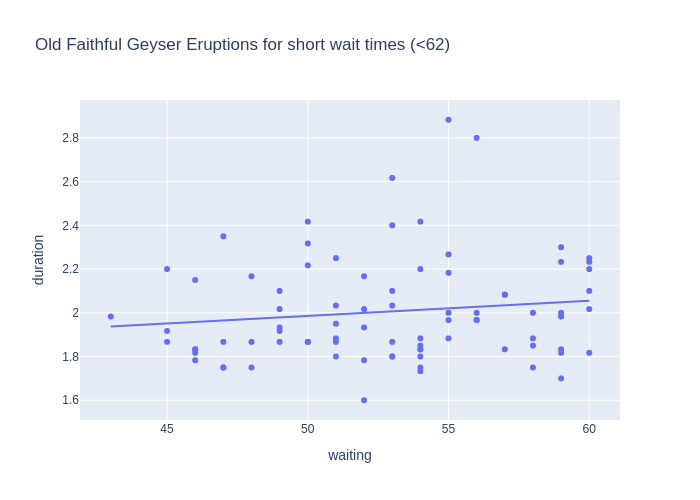

In [16]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


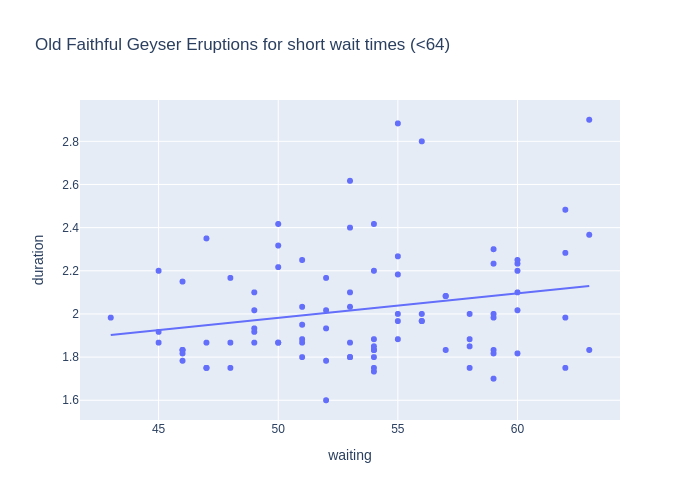

In [18]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


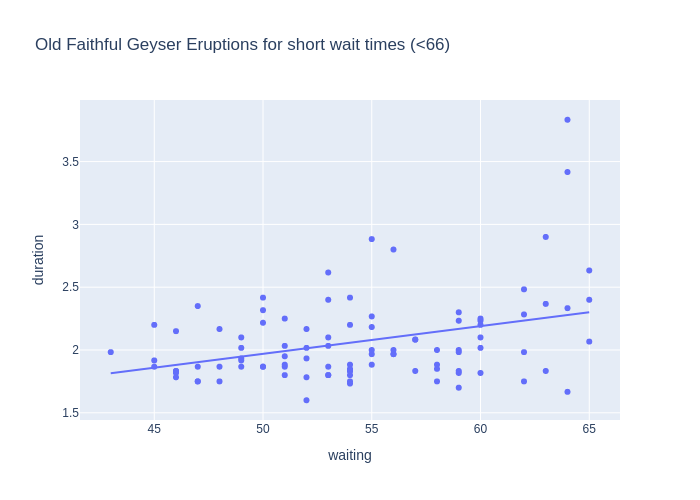

In [19]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The p-value is 0.238 at short waiting times less than 62 minutes means that there is no evidence against H0, which means that we believe that there is no linear relationship between waiting time and eruption duration at short waiting times less than 62 minutes.

And at short waiting times less than 64 minutes, the p-value is 0.036, which means there is moderate evidence against H0, we believe that there is linear relationship between waiting time and eruption duration at short waiting times less than 64 minutes.

At short waiting times less than 66 minutes, the p-value is 0, meaning there is very strong evidence against H0, so we  believe there is linear relationship between waiting time and eruption duration at short waiting times less than 66 minutes.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


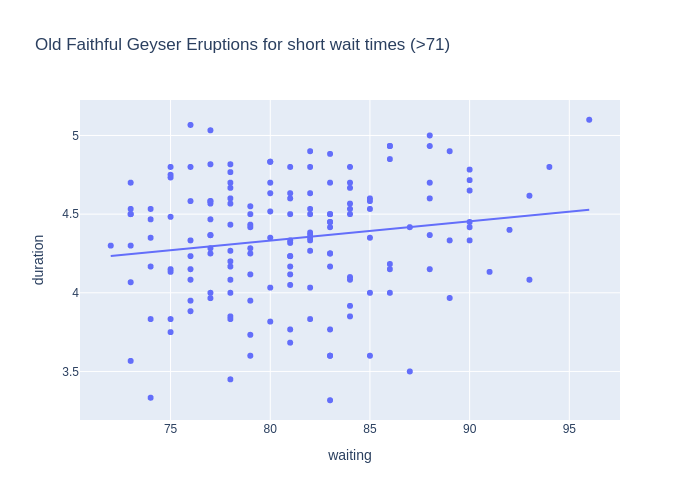

In [21]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Question 10

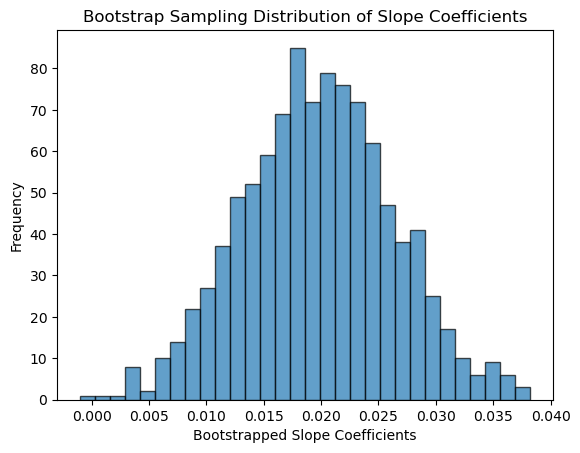

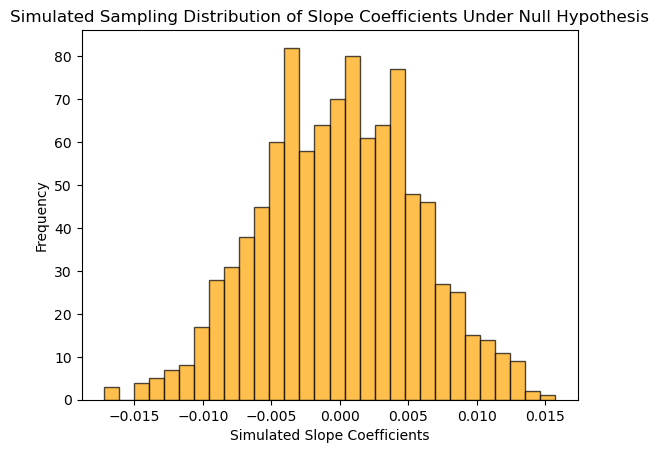

In [39]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Filter for long wait times (e.g., wait times greater than a certain threshold, here as an example, we assume > 70)
long_wait = old_faithful['waiting'] > 70
old_faithful_long_wait = old_faithful[long_wait]

# Bootstrap Sampling of Slope Coefficients
bootstrapped_slope_coefficients = []
n_bootstrap_samples = 1000

for _ in range(n_bootstrap_samples):
    bootstrap_sample = old_faithful_long_wait.sample(n=len(old_faithful_long_wait), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    bootstrapped_slope_coefficients.append(fitted_model.params['waiting'])

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualization of Bootstrapped Slope Coefficients
fig, ax = plt.subplots()
ax.hist(bootstrapped_slope_coefficients, bins=30, edgecolor='k', alpha=0.7)
ax.set_xlabel('Bootstrapped Slope Coefficients')
ax.set_ylabel('Frequency')
ax.set_title('Bootstrap Sampling Distribution of Slope Coefficients')

# Save and show the figure
fig.savefig("bootstrapped_slope_distribution.png", format='png')
plt.show()  # This will display the first figure

# Simulate Sampling Distribution of Slope Coefficients Under Null Hypothesis
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
simulated_slope_coefficients = []

for _ in range(n_bootstrap_samples):
    old_faithful_simulation = old_faithful_long_wait.copy()
    old_faithful_simulation['duration'] = (
        beta_0 + beta_1 * old_faithful_simulation['waiting'] +
        stats.norm(loc=0, scale=sigma).rvs(size=len(old_faithful_simulation))
    )
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation)
    fitted_model = model.fit()
    simulated_slope_coefficients.append(fitted_model.params['waiting'])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualization of Simulated Slope Coefficients Under Null Hypothesis
fig, ax = plt.subplots()
ax.hist(simulated_slope_coefficients, bins=30, edgecolor='k', alpha=0.7, color='orange')
ax.set_xlabel('Simulated Slope Coefficients')
ax.set_ylabel('Frequency')
ax.set_title('Simulated Sampling Distribution of Slope Coefficients Under Null Hypothesis')

# Save and show the figure
fig.savefig("simulated_slope_distribution.png", format='png')
plt.show()  # This will display the second figure


In [40]:
# Calculate the 95% bootstrapped confidence interval
ci_lower, ci_upper = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Check if 0 is within the bootstrapped confidence interval
contains_zero = (ci_lower <= 0) and (ci_upper >= 0)

# Calculate the observed slope coefficient from the original model
observed_slope = smf.ols('duration ~ waiting', data=old_faithful_long_wait).fit().params['waiting']

# Calculate the simulated p-value
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Output results
print("95% Bootstrapped Confidence Interval for Slope Coefficient:", (ci_lower, ci_upper))
print("Contains 0:", contains_zero)
print("Simulated p-value:", simulated_p_value)


95% Bootstrapped Confidence Interval for Slope Coefficient: (0.007165560435234922, 0.03278015271434319)
Contains 0: False
Simulated p-value: 0.0


In [25]:
smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.7216,0.478,5.695,0.000,1.778,3.665
waiting,0.0198,0.006,3.350,0.001,0.008,0.031


0 is not within the 95% confidence interval, and the p-value is the same as in the code “smf.os(‘duration ~ waiting’, data=old_faithful[long_wait]).fit().summary().tables[1]”. same, are close to 0. This means there is strong evidence against H0.

# Question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


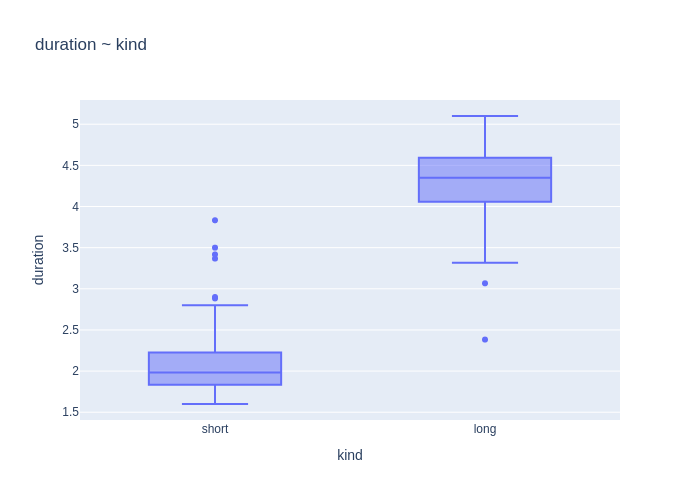

In [42]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


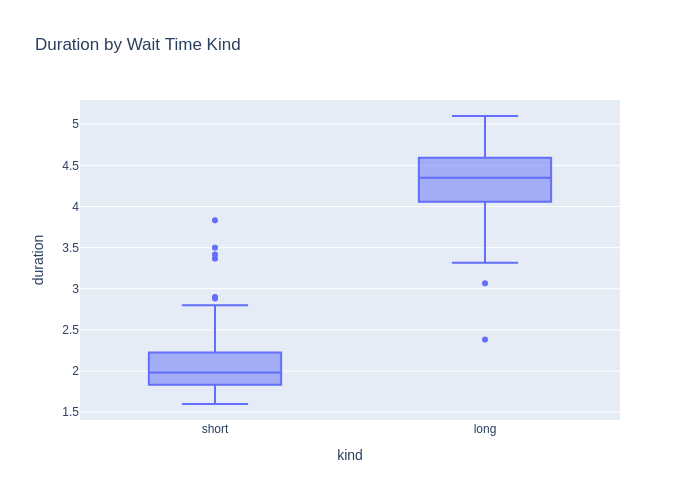

In [43]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the new short and long categories based on the new threshold
short_wait = old_faithful['waiting'] < 68
long_wait = old_faithful['waiting'] >= 68

# Add a 'kind' column to classify wait times
old_faithful['kind'] = np.where(short_wait, 'short', 'long')

# Fit the model using the indicator variable for wait time length
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary of the fitted model
display(model.summary().tables[1])

# Visualization: Box plot of duration by kind
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration by Wait Time Kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")  # Use PNG for submissions


#### smf.ols('duration ~ waiting', data=old_faithful)
The model predicts eruption duration based on a continuous variable of waiting time. It evaluates the linear relationship between waiting time and eruption duration.

#### smf.ols('duration ~ waiting', data=old_faithful[short_wait])
The model focuses only on short waiting times and examines their relationship to eruption duration.

#### smf.ols('duration ~ waiting', data=old_faithful[long_wait])
The model separately analyzes long wait times to determine their relationship to eruption duration.

From the output of the code above, the p-value of the hypothesis test is 0, which means that there is very strong evidence against H0 (there is no difference between the mean eruption durations of the short-waiting and the long-waiting groups), which means that we believe that there is a difference in the mean eruption durations of the short-waiting and the long-waiting groups

# Question 12

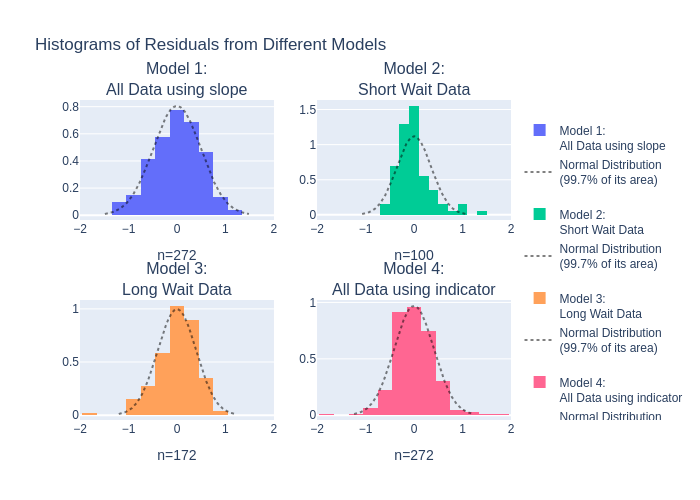

In [45]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Model 1 appears to be roughly symmetrical, following closely the normal distribution curve superimposed. This supports the assumption that the residualsare likely to be normally distributed, making the model the most reasonable in terms of satisfying the normality assumption. The other three graphs have asymmetric distributions

# Question 13

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define "kind" categories based on the new criteria
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Calculate the observed mean difference between groups
observed_mean_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# (A) Permutation Test
n_permutations = 1000
permuted_diffs = []

for _ in range(n_permutations):
    # Shuffle the 'kind' labels
    shuffled_df = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)
    # Calculate the mean difference in duration for shuffled labels
    mean_diff = shuffled_df.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permuted_diffs.append(mean_diff)

# Convert permuted_diffs to a numpy array
permuted_diffs = np.array(permuted_diffs)

# Calculate p-value as the proportion of permuted differences as extreme as the observed mean difference
p_value_permutation = (np.abs(permuted_diffs) >= np.abs(observed_mean_diff)).mean()

# (B) Bootstrap Confidence Interval
n_bootstrap_samples = 1000
bootstrapped_mean_diffs = []

for _ in range(n_bootstrap_samples):
    # Bootstrap samples within each group
    bootstrap_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    # Calculate the mean difference in duration for bootstrap sample
    mean_diff = bootstrap_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_diffs.append(mean_diff)

# Convert bootstrapped_mean_diffs to a numpy array
bootstrapped_mean_diffs = np.array(bootstrapped_mean_diffs)

# Calculate 95% bootstrap confidence interval
ci_bootstrap = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

# Print results
print(f"Observed Mean Difference: {observed_mean_diff}")
print(f"Permutation Test p-value: {p_value_permutation}")
print(f"Bootstrap 95% Confidence Interval for Mean Difference: {ci_bootstrap}")


Observed Mean Difference: 2.20360023255814
Permutation Test p-value: 0.0
Bootstrap 95% Confidence Interval for Mean Difference: [2.10210034 2.30216131]


Permutation Test: This method generates a null distribution by randomly disrupting group labels. Each disruption redistributes eruption durations into “short” and “long” categories, simulating a situation where there is no real difference in durations between groups. The test assesses how often the observed differences occur by chance.

Bootstrap confidence intervals: This method resamples eruption durations within each group independently. For each resample, we compute the average difference between groups to create a distribution of average differences under repeated sampling. This distribution allows us to create confidence intervals around the observed mean differences.

Indicator variable models use parametric assumptions.
Permutation and bootstrap tests are more flexible and do not require specific model assumptions for inference.

# Question 14

YES

# Summary by ChatGPT
#### 1.
In this conversation, we discussed using a theoretical simple linear regression model to simulate data and create a fitted regression model. We started by explaining the components of a simple linear regression model, including the predictor and outcome variables, slope, intercept, and error term. Then, using `numpy` and `scipy.stats`, we generated random data and visualized it with the true linear trend.

Next, we explored how to fit a simple linear regression model in Python using `statsmodels.formula.api` (specifically `smf.ols`). I explained the purpose of each line of code, such as specifying and fitting the model, interpreting summary outputs, and visualizing the model with a trendline using Plotly. Finally, I demonstrated how to combine the simulated data into a pandas DataFrame called `df` with columns named "x" and "Y".

#### 2.
This conversation explains two code snippets that demonstrate how to simulate, fit, and visualize a simple linear regression model. 

- **First Code**: Simulates observed data based on a theoretical linear relationship \( y = \beta_0 + \beta_1 \cdot x + \epsilon \), where `epsilon` introduces random noise. It plots both the "True Line" (expected \( y \) without noise) and the observed data points to show the ideal model versus the sampled variation.

- **Second Code**: Fits an OLS regression model to the simulated data using `statsmodels`, storing it in a DataFrame, and visualizes the fitted line. The fitted line represents the best fit calculated from the noisy data points, showing the influence of random sampling.

**Comparison**: The true line represents the ideal linear relationship, unaffected by sampling variation, while the fitted line shows the observed relationship in a specific sample, capturing the impact of random noise.

#### 3.
In this conversation, we discussed how to derive `fitted_model.fittedvalues` in the context of a simple linear regression model using the `statsmodels` library. Here's a summary of the key points:

1. **Theoretical Model**: The fitted values (\( \hat{Y}_i \)) are predictions based on the estimated intercept (\( \hat{\beta_0} \)) and slope (\( \hat{\beta_1} \)) from the regression.

2. **Fitting the Model**: After fitting the model with `statsmodels`, you can access the estimated coefficients using `fitted_model.params`.

3. **Calculating Fitted Values**: The fitted values are calculated using the formula \( \hat{Y}_i = \hat{\beta_0} + \hat{\beta_1} X_i \), where \( X_i \) is the value of the independent variable.

4. **Direct Access**: You can directly get the fitted values from the model using `fitted_model.fittedvalues`.

5. **Example**: We demonstrated the process with a simple dataset (Study Hours vs. Test Scores) to calculate the fitted values both manually and using the built-in method.

This provides an overview of how fitted values are derived from a linear regression model and how they can be calculated using both the estimated coefficients and the `statsmodels` library functions.

#### 4.
In this conversation, the user asked about the ordinary least squares (OLS) method used for fitting a trendline (e.g., with `trendline='ols'` or `smf.ols(...).fit()`). The explanation clarified that OLS minimizes the sum of squared differences between the observed and predicted values to determine the best-fitting line, emphasizing larger errors and ensuring unique line fitting.

#### 5.
In this conversation, we discussed the interpretation of several expressions related to Simple Linear Regression models:

1. The first expression calculates the proportion of variation in \( Y \) explained by the model, which is the coefficient of determination (R²).
2. The second expression, `fitted_model.rsquared`, directly provides the \( R^2 \) value, quantifying how much of the variation in \( Y \) is explained by the model.
3. The third expression, `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`, calculates the squared correlation between \( Y \) and the predicted values, which is equivalent to \( R^2 \).
4. The fourth expression, `np.corrcoef(Y, x)[0,1]**2`, measures the proportion of variance in \( Y \) explained by the predictor variable \( x \), also equivalent to \( R^2 \).

All of these expressions essentially capture the proportion of variance in \( Y \) explained by the regression model, and \( R^2 \) is interpreted as a measure of the model’s accuracy.

#### 6.
In this conversation, we discussed the assumptions of the Simple Linear Regression (SLR) model in the context of a dataset showing the relationship between the amount of fertilizer used and crop yield. We reviewed the four main assumptions: linearity, independence, homoscedasticity, and normality of residuals. 

The potential issues identified with this data include:
1. **Non-linearity**: If the relationship between fertilizer and crop yield is not purely linear (e.g., diminishing returns), the linear regression model may not be appropriate.
2. **Homoscedasticity**: If the residuals exhibit increasing or decreasing spread as fertilizer amount changes, this would indicate a violation of the homoscedasticity assumption.

These two assumptions (linearity and homoscedasticity) are most likely to be violated in this scenario.

#### 7.
In this conversation, we explored two statistical approaches—**permutation testing** and **bootstrap confidence intervals**—for comparing eruption durations between two groups ("short" and "long") in the Old Faithful Geyser dataset, based on the new classification of wait times (less than 68 as "short" and otherwise as "long").

Key Steps:
1. **Permutation Test**:
   - We shuffled the "kind" labels (short/long) to simulate the null hypothesis of no difference between the groups.
   - We calculated the mean difference between groups in each permutation and computed a p-value by comparing the observed difference to this null distribution.

2. **Bootstrap Confidence Interval**:
   - We resampled within each group, calculating the mean difference between the "short" and "long" groups for each bootstrap sample.
   - A 95% confidence interval for the mean difference was constructed using the quantiles of the bootstrapped distribution.

3. **Comparison with Indicator Variable Model**:
   - The **indicator variable model** (using a linear regression with an indicator for group membership) provides a parametric approach to testing differences between groups.
   - **Permutation and bootstrap tests** are non-parametric, do not require model assumptions, and provide alternative ways of understanding group differences.

Results:
- We calculated the **observed mean difference** between the groups.
- The **permutation test p-value** indicated whether the observed mean difference is likely under the null hypothesis of no difference.
- The **bootstrap 95% confidence interval** provided a range of plausible values for the true mean difference.

These methods offer alternative insights to the indicator variable model, allowing for a more flexible, non-parametric comparison of group differences.

# ChatGPT History

1.https://chatgpt.com/share/672c050b-1a18-800b-a3a4-79b806fe499c

2.https://chatgpt.com/share/672c051a-207c-800b-8e4a-27c1d4e52a9c

3.https://chatgpt.com/share/672c0526-d01c-800b-9e54-b4901966895f

4.https://chatgpt.com/share/672c054d-3698-800b-a0c3-d0c367b4842e

5.https://chatgpt.com/share/672c055a-7048-800b-b865-3b897711efcc

6.https://chatgpt.com/share/672c0566-1590-800b-8fa2-f107ba4ed94d

7.https://chatgpt.com/share/672c0571-8604-800b-9a43-e876ccb09376